In [1]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression
import matplotlib.ticker as ticker      # for formatting axis ticks (e.g., adding commas to large numbers)
from reformat_column import format_number
import seaborn as sns

# need to switch to csv
# Load the CSV file
file_path = 'Resources/data.csv'
csv_df = pd.read_csv(file_path, header=0)

# Display sheet names to identify relevant data
print(csv_df)


                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date All Time Rank Spotify Streams  \
0      Tommy Richman    4/26/202

##### Data Cleaning and Setup

In [2]:
# Select relevant columns
columns_to_select=['Track', 'Album Name', 'Artist', 'Release Date', 'TikTok Likes', "TikTok Views",	"YouTube Likes",'Explicit Track']

youtube_likes_data = csv_df[columns_to_select]

youtube_likes_data.head()

,Track,Album Name,Artist,Release Date,TikTok Likes,TikTok Views,YouTube Likes,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,"651,565,900","5,332,281,936","1,713,126",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,"35,223,547","208,339,025","3,486,739",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,"275,154,237","3,369,120,610","2,228,730",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,"1,078,757,968","14,603,725,994","10,629,796",0
4,Houdini,Houdini,Eminem,5/31/2024,NaN,NaN,"3,670,188",1


In [3]:
# Drop blank rows
youtube_likes_data_clean = youtube_likes_data.dropna()
youtube_likes_data_clean.count()

Track             3527
Album Name        3527
Artist            3527
Release Date      3527
TikTok Likes      3527
TikTok Views      3527
YouTube Likes     3527
Explicit Track    3527
dtype: int64

In [4]:
# Show new data
print(youtube_likes_data_clean.dtypes)

Track             object
Album Name        object
Artist            object
Release Date      object
TikTok Likes      object
TikTok Views      object
YouTube Likes     object
Explicit Track     int64
dtype: object


In [5]:
# Conversion to start
print("Before conversion:")
print(youtube_likes_data_clean[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].count())

Before conversion:
TikTok Likes     3527
TikTok Views     3527
YouTube Likes    3527
dtype: int64


In [14]:
# Function to convert to numeric
def convert_to_numeric(value):
    if pd.isna(value):
        return np.nan
    try:
        # Remove commas and convert to float
        return float(str(value).replace(',', ''))
    except ValueError:
        return np.nan

# Apply the conversion to both columns
youtube_likes_data_clean['TikTok Likes'] = youtube_likes_data_clean['TikTok Likes'].apply(convert_to_numeric)
youtube_likes_data_clean['TikTok Views'] = youtube_likes_data_clean['TikTok Views'].apply(convert_to_numeric)
youtube_likes_data_clean['YouTube Likes'] = youtube_likes_data_clean['YouTube Likes'].apply(convert_to_numeric)

# Check the results
print("After conversion:")
print(youtube_likes_data_clean[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].dtypes)
print(youtube_likes_data_clean[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].count())

# Check for any remaining non-numeric values
print("\nNon-numeric values in TikTok Likes:")
print(youtube_likes_data_clean[pd.isna(youtube_likes_data_clean['TikTok Likes'])]['TikTok Likes'].head())

print("\nNon-numeric values in TikTok Views:")
print(youtube_likes_data_clean[pd.isna(youtube_likes_data_clean['TikTok Views'])]['TikTok Views'].head())

print("\nNon-numeric values in YouTube Likes:")
print(youtube_likes_data_clean[pd.isna(youtube_likes_data_clean['YouTube Likes'])]['YouTube Likes'].head())

# Display sample of original values
print("\nSample of original TikTok Likes values:")
print(youtube_likes_data_clean['TikTok Likes'].head())

print("\nSample of original TikTok Views values:")
print(youtube_likes_data_clean['TikTok Views'].head())

print("\nSample of original YouTube Likes values:")
print(youtube_likes_data_clean['YouTube Likes'].head())

After conversion:
TikTok Likes     float64
TikTok Views     float64
YouTube Likes    float64
dtype: object
TikTok Likes     3527
TikTok Views     3527
YouTube Likes    3527
dtype: int64

Non-numeric values in TikTok Likes:
Series([], Name: TikTok Likes, dtype: float64)

Non-numeric values in TikTok Views:
Series([], Name: TikTok Views, dtype: float64)

Non-numeric values in YouTube Likes:
Series([], Name: YouTube Likes, dtype: float64)

Sample of original TikTok Likes values:
0    6.515659e+08
1    3.522355e+07
2    2.751542e+08
3    1.078758e+09
5    2.149435e+08
Name: TikTok Likes, dtype: float64

Sample of original TikTok Views values:
0    5.332282e+09
1    2.083390e+08
2    3.369121e+09
3    1.460373e+10
5    2.938687e+09
Name: TikTok Views, dtype: float64

Sample of original YouTube Likes values:
0     1713126.0
1     3486739.0
2     2228730.0
3    10629796.0
5     1392593.0
Name: YouTube Likes, dtype: float64


/var/folders/pk/d9_1yzcs09l090ywbgh8b9kw0000gn/T/ipykernel_98196/588994270.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_likes_data_clean['TikTok Likes'] = youtube_likes_data_clean['TikTok Likes'].apply(convert_to_numeric)
/var/folders/pk/d9_1yzcs09l090ywbgh8b9kw0000gn/T/ipykernel_98196/588994270.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  youtube_likes_data_clean['TikTok Views'] = youtube_likes_data_clean['TikTok Views'].apply(convert_to_numeric)
/var/folders/pk/d9_1yzcs09l090ywbgh8

In [15]:
# Sort by TikTok Likes
tik_tok_sort = youtube_likes_data_clean.sort_values(by='TikTok Likes', ascending=True)

tik_tok_sort.to_csv('Resources/check.csv',index=False)

In [20]:
# Create top 500 TikTok dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = tik_tok_sort.head(500)
top_25_tiktok_df = tik_tok_sort.head(25)
top_10_tiktok_df = tik_tok_sort.head(10)

# formatted_tik_tok_sort = tik_tok_sort.style.format({
#     'TikTok Likes': '{:,.0f}',
#     'YouTube Likes': '{:,.0f}',
#     'TikTok Views': '{:,.0f}'
# })

# formatted_top_500_df = top_500_tiktok_df.style.format({
#     'TikTok Likes': '{:,.2f}',
#     'YouTube Likes': '{:,.2f}',
#     'TikTok Views': '{:,.2f}'
# })

# formatted_top_25_df = top_25_tiktok_df.style.format({
#     'TikTok Likes': '{:,.2f}',
#     'YouTube Likes': '{:,.2f}',
#     'TikTok Views': '{:,.2f}'
# })


# top_500_tiktok_df.head()

# formatted_tik_tok_sort
print(tik_tok_sort.dtypes)
# top_500_tiktok_df.head()

Track              object
Album Name         object
Artist             object
Release Date       object
TikTok Likes      float64
TikTok Views      float64
YouTube Likes     float64
Explicit Track      int64
dtype: object


##### Correlation Analysis

**Objective**: Compute correlation coefficients between TikTok likes and YouTube views, Spotify streams, and other relevant metrics.

**Interpretation**: The resulting matrix will show the correlation coefficients between TikTok likes and the other metrics. Values close to 1 or -1 indicate strong correlations, while values near 0 suggest weak or no correlation.

In [21]:
# Compute the correlation matrix
correlation_matrix_all_data = tik_tok_sort[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].corr()

# Display the correlation matrix
print(correlation_matrix_all_data)

               TikTok Likes  TikTok Views  YouTube Likes
TikTok Likes       1.000000      0.992986       0.047203
TikTok Views       0.992986      1.000000       0.041471
YouTube Likes      0.047203      0.041471       1.000000


In [22]:
# Compute the correlation matrix
correlation_matrix =  top_500_tiktok_df[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].corr()

# Display the correlation matrix
print(correlation_matrix)

               TikTok Likes  TikTok Views  YouTube Likes
TikTok Likes       1.000000      0.732429      -0.060391
TikTok Views       0.732429      1.000000      -0.034167
YouTube Likes     -0.060391     -0.034167       1.000000


In [23]:
# Compute the correlation matrix
correlation_matrix =  top_10_tiktok_df[['TikTok Likes', 'TikTok Views', 'YouTube Likes']].corr()

# Display the correlation matrix
print(correlation_matrix)

               TikTok Likes  TikTok Views  YouTube Likes
TikTok Likes       1.000000      0.827953       0.506370
TikTok Views       0.827953      1.000000       0.292064
YouTube Likes      0.506370      0.292064       1.000000


##### Viral Success: TikTok Likes vs. YouTube & Spotify Engagement Growth

**Objective**: Identify songs with high TikTok likes but moderate-to-low performance on YouTube and Spotify, and vice versa.

**Interpretation**: This analysis will help you identify tracks that are popular on TikTok but haven't garnered equivalent attention on YouTube or Spotify.

In [ ]:
# Define thresholds (these can be adjusted based on your data distribution)
high_tiktok_threshold = top_500_tiktok_df['TikTok Likes'].quantile(0.75)
low_youtube_like_threshold = top_500_tiktok_df['YouTube Likes'].quantile(0.25)

# Identify songs with high TikTok likes but low YouTube likes
high_tiktok_low_like_youtube = top_500_tiktok_df[(top_500_tiktok_df['TikTok Likes'] > high_tiktok_threshold) & 
                             (top_500_tiktok_df['YouTube Likes'] < low_youtube_like_threshold)]


# Display the results
print("High TikTok Likes but Low YouTube Likes:")
print(high_tiktok_low_like_youtube)

High TikTok Likes but Low YouTube Likes:
                                       Track  \
2289                              Atmosphere   
1270                          Guilty as Sin?   
3490                Let Your Boys Be Country   
1798  DNA (Loving You) [feat. Hannah Boleyn]   
2382                           I Can Feel It   
2738                            Burn It Down   
2226   OUT OUT (feat. Charli XCX & Saweetie)   
4062                          sonnenbank.mp3   
4336                      Your Heart Or Mine   
3152          Give It To Me - Full Vocal Mix   
3201                              EMPELOTICA   
1458                      TIL FURTHER NOTICE   
4073                              Pelle Coat   
3188                         Halfway To Hell   
1059            WORTH IT (feat. Don Toliver)   
2401                              Dirt Cheap   
4051                                    BOTH   
4210                                  Cruise   
723                      Ya No Tengo Tu Love   

#### YouTube Likes vs. TikTok Likes

##### All data (cleaned)

In [34]:
# Select relevant columns
df = tik_tok_sort[['TikTok Likes', 'YouTube Likes']]

# Compute the correlation
correlation = df['TikTok Likes'].corr(df['YouTube Likes'])

# Display the correlation
print(f"Correlation between TikTok Likes and YouTube Likes: {correlation}")


Correlation between TikTok Likes and YouTube Likes: 0.04720276437258043


**Scatter Plot with Linear Regression Line**

**Objective**: Visualize the relationship between TikTok likes and YouTube likes, and fit a linear regression line to assess the strength and direction of this relationship.

**Interpretation**: This visualization will help you observe any linear relationship between TikTok likes and YouTube likes. The slope of the regression line indicates the nature of the relationship, while the scatter of data points around the line shows the variability.

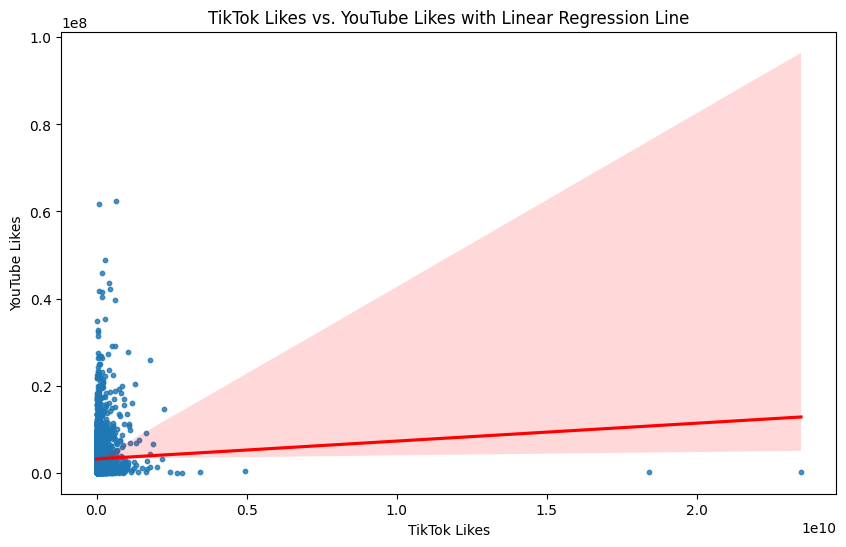

In [49]:
df = tik_tok_sort.dropna(subset=['TikTok Likes', 'YouTube Likes'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='TikTok Likes', y='YouTube Likes', data=df, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.xlabel('TikTok Likes')
plt.ylabel('YouTube Likes')
plt.title('TikTok Likes vs. YouTube Likes with Linear Regression Line')
plt.show()

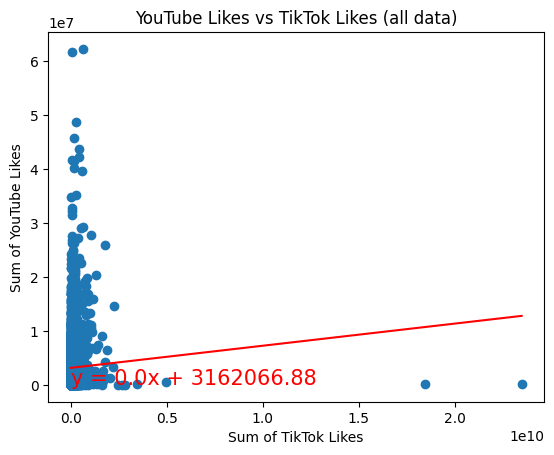

The r^2-value is: 0.002228100964413348


In [50]:
# YouTube Likes vs TikTok Views
# Does high TikTok likes correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = tik_tok_sort['TikTok Likes']
y_values = tik_tok_sort['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('Sum of TikTok Likes')
plt.ylabel('Sum of YouTube Likes')
plt.title('YouTube Likes vs TikTok Likes (all data)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

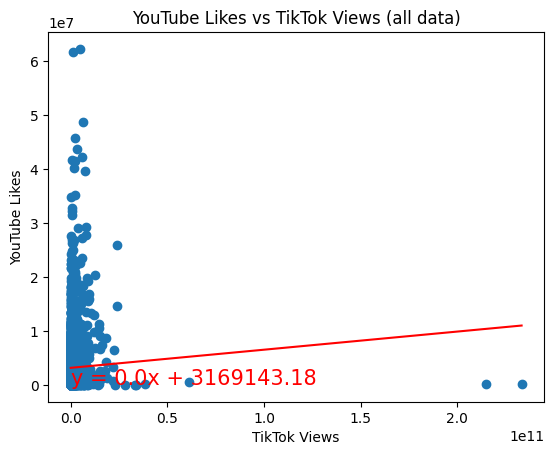

The r^2-value is: 0.0017198284897105395


In [51]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = tik_tok_sort['TikTok Views']
y_values = tik_tok_sort['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Views')
plt.ylabel('YouTube Likes')
plt.title('YouTube Likes vs TikTok Views (all data)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

**Switching the control**

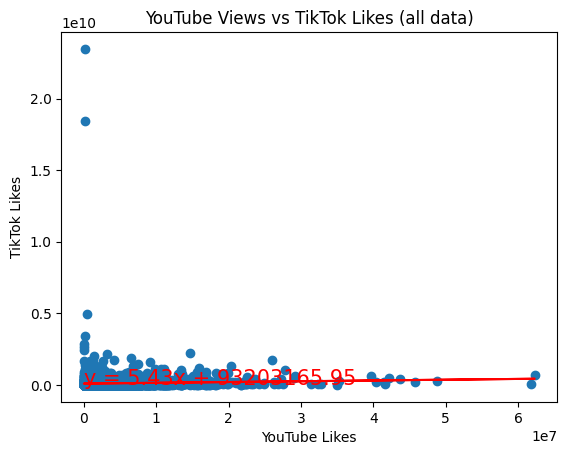

The r^2-value is: 0.002228100964413348


In [52]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = tik_tok_sort['YouTube Likes']
y_values = tik_tok_sort['TikTok Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Likes')
plt.title('YouTube Views vs TikTok Likes (all data)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

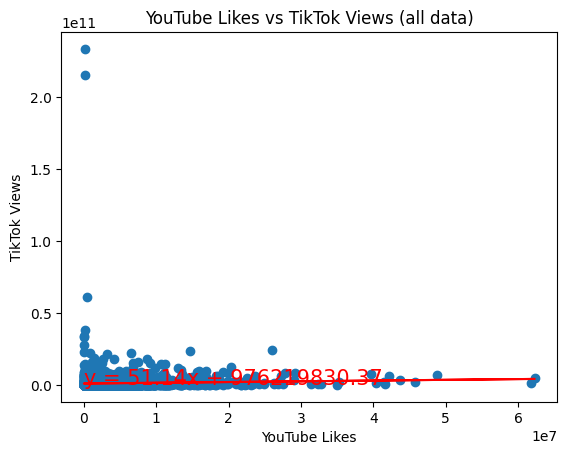

The r^2-value is: 0.0017198284897105395


In [53]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = tik_tok_sort['YouTube Likes']
y_values = tik_tok_sort['TikTok Views']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Views')
plt.title('YouTube Likes vs TikTok Views (all data)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

##### Top-500 (in TikTok likes)

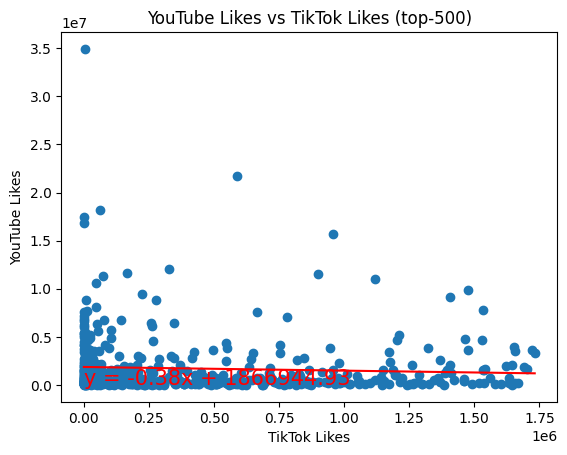

The r^2-value is: 0.003647057735456614


In [ ]:
# YouTube Likes vs TikTok Likes
# Does high TikTok likes correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['TikTok Likes']
y_values = top_500_tiktok_df['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Likes')
plt.ylabel('YouTube Likes')
plt.title('YouTube Likes vs TikTok Likes (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

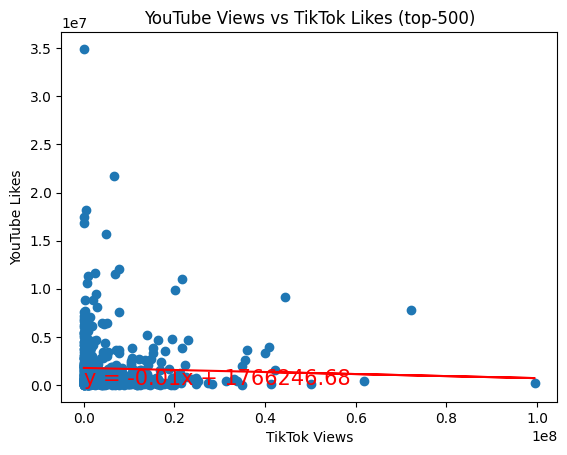

The r^2-value is: 0.0011674052014385876


In [ ]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['TikTok Views']
y_values = top_500_tiktok_df['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Views')
plt.ylabel('YouTube Likes')
plt.title('YouTube Likes vs TikTok Views (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

**Switching the control**

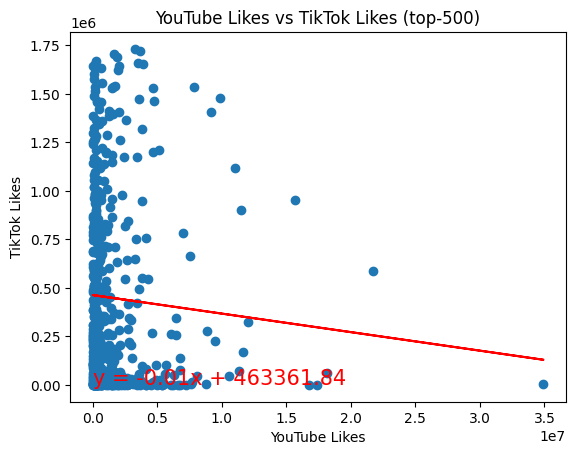

The r^2-value is: 0.003647057735456614


In [ ]:
# YouTube Likes vs TikTok likes
# Does high TikTok likes correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['YouTube Likes']
y_values = top_500_tiktok_df['TikTok Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Likes')
plt.title('YouTube Likes vs TikTok Likes (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

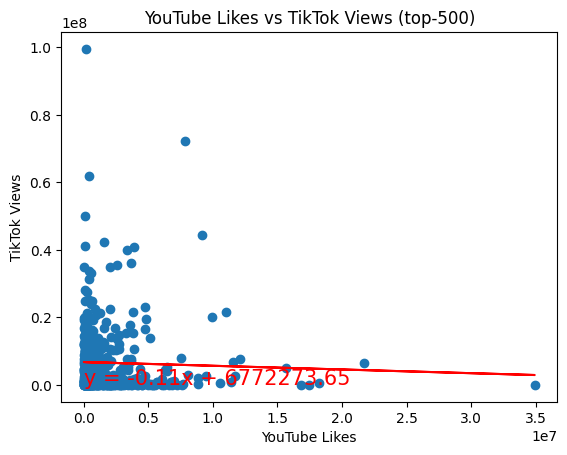

The r^2-value is: 0.0011674052014385876


In [ ]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_500_tiktok_df['YouTube Likes']
y_values = top_500_tiktok_df['TikTok Views']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Views')
plt.title('YouTube Likes vs TikTok Views (top-500)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

##### Top-10 (in TikTok likes)

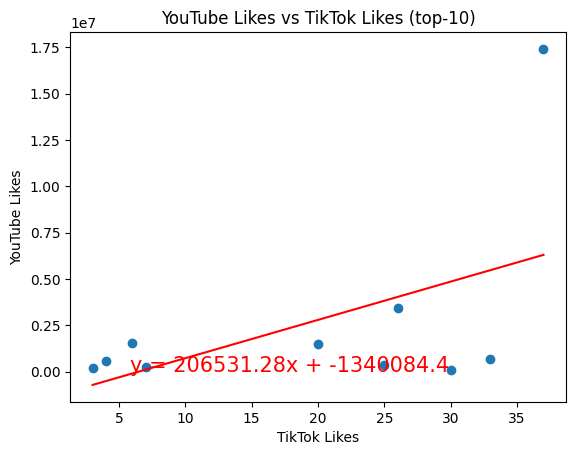

The r^2-value is: 0.25641101492761004


In [47]:
# YouTube Likes vs TikTok Likes
# Does high TikTok likes correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df['TikTok Likes']
y_values = top_10_tiktok_df['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Likes')
plt.ylabel('YouTube Likes')
plt.title('YouTube Likes vs TikTok Likes (top-10)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

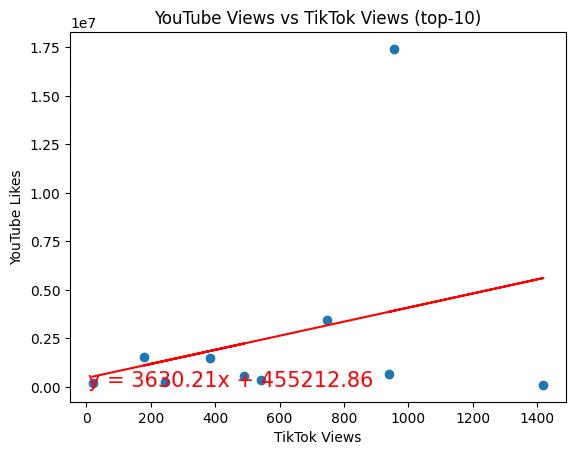

The r^2-value is: 0.08530150499757698


In [48]:
# YouTube Likes vs TikTok Views
# Does high TikTok views correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df['TikTok Views']
y_values = top_10_tiktok_df['YouTube Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('TikTok Views')
plt.ylabel('YouTube Likes')
plt.title('YouTube Views vs TikTok Views (top-10)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

**Switching the control**

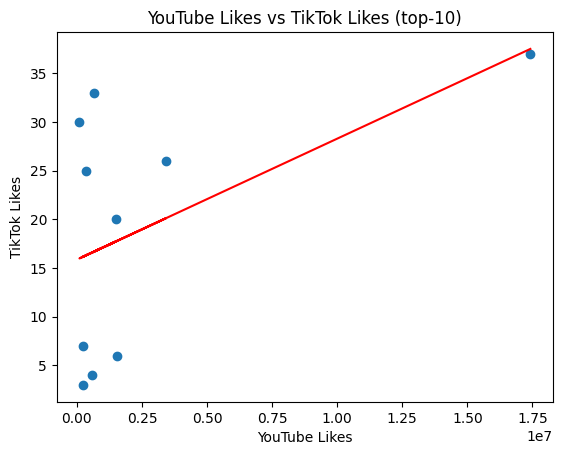

The r^2-value is: 0.25641101492761004


In [54]:
# YouTube Likes vs TikTok likes
# Does high TikTok likes correlate to high YouTube likes?
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df['YouTube Likes']
y_values = top_10_tiktok_df['TikTok Likes']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Likes')
plt.title('YouTube Likes vs TikTok Likes (top-10)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")

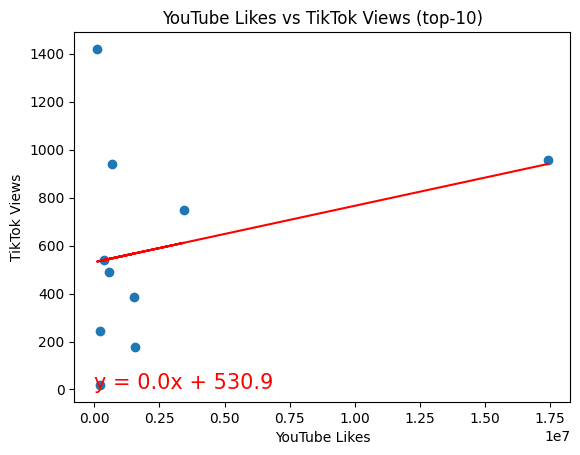

The r^2-value is: 0.08530150499757698


In [55]:
# YouTube Likes vs TikTok views
# Does high YouTube likes correlated to high TikTok views?
# Add the linear regression equation and line to plot
x_values = top_10_tiktok_df['YouTube Likes']
y_values = top_10_tiktok_df['TikTok Views']

#the output will be a tuple of multiple values  for linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # print the equation in my graph (string)

# Create a scatterplot
plt.scatter(x_values, y_values)
plt.xlabel('YouTube Likes')
plt.ylabel('TikTok Views')
plt.title('YouTube Likes vs TikTok Views (top-10)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.show()
print(f"The r^2-value is: {rvalue**2}")